In [1]:
# coding: UTF-8
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation

nx=128+4
ny=128+4
nz=128+4
nd=19
nloop=100+1
step=20

/Users/maeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


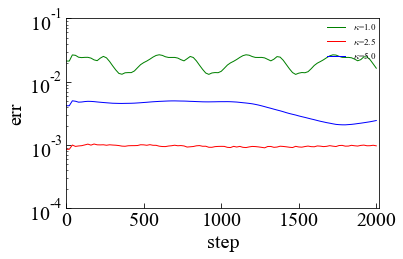

0.3907352

In [4]:
#dir1  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100/'
#dir2  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T10-cg1-L100/'
#dir3  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T50-cg1-L100/'
#dir4  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T5-cg1-L100/'
#dir5  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T100-cg1-L100/'

#dir1  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-eq-ot/'
#dir2  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T10-cg1-L100-eq/'
#dir3  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T50-cg1-L100-eq/'
dir4  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T5-cg1-L100-eq-ot/'
dir5  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T100-cg1-L100-eq/'

#dir2  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T50-cg1-L100-eq-ot/'
#dir3  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T10-cg1-L100-eq-ot/'

dir1  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-mv-002/'
dir2  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-mv-01/'
dir3  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-mv-05/'

#dir1  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-hv1000/'
#dir5  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-hv10000/'

#dir2  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/kp-1-10-cg1-mash128-L100/'
#dir3  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/kp-1-9-cg1-mash128-L100/'
#dir4  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/kp-1-8-cg1-mash128-L100/'

#dir3  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/kp-1-10-cg1-mash64-L100/'
#dir4  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/kp-1-10-cg1-mash256-L100/'

#dir5  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-kp/'

#dir2  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg10-L100/'
#dir3  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg-1-L100/'

#dir3  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T100-cg-1-L100/'
#dir4  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T100-cg1-L1000/'
#dir5  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T10-cg-1-L10/'
'''
dir1  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-64-1000st-T20-cg1-L100/'
dir2  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-64-1000st-T10-cg1-L100/'
dir3  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-64-1000st-T50-cg1-L100/'
dir4  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-64-1000st-T5-cg1-L100/'
dir5  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-64-1000st-T100-cg1-L100/'
#dir2  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-64-2000st-T5-cg1-L100-halfdt/'
'''

folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Phiexa"  #+ str(np.int(sample_frequency)) 


rms1 = [0] * nloop
rms2 = [0] * nloop
rms3 = [0] * nloop
rms4 = [0] * nloop
rms5 = [0] * nloop

ratio = [0] * nloop

b = np.arange(nloop)
b=b*step
for i in range(1,nloop):
    
    h5file1 = h5py.File(dir1+'NAllHDF'+"%03.f"%(i)+'.h5',"r")
    h5file2 = h5py.File(dir2+'NAllHDF'+"%03.f"%(i)+'.h5',"r")
    h5file3 = h5py.File(dir3+'NAllHDF'+"%03.f"%(i)+'.h5',"r")
    h5file4 = h5py.File(dir4+'NAllHDF'+"%03.f"%(i)+'.h5',"r")
    h5file5 = h5py.File(dir5+'NAllHDF'+"%03.f"%(i)+'.h5',"r")

    #データ読み込み
    Phiwv1to1  = h5file1[folder1+"/Phiwv1"].value 
    Phiexa1 = h5file1[folder2+"/Phiexa"].value 
    mx1=np.max(Phiexa1)
    mn1=np.min(Phiexa1)
    
    Phiwv1to2  = h5file2[folder1+"/Phiwv1"].value 
    Phiexa2  = h5file2[folder2+"/Phiexa"].value 
    mx2=np.max(Phiexa2)
    mn2=np.min(Phiexa2)
    
    Phiwv1to3  = h5file3[folder1+"/Phiwv1"].value 
    Phiexa3  = h5file3[folder2+"/Phiexa"].value 
    mx3=np.max(Phiexa3)
    mn3=np.min(Phiexa3)
    
    
    Phiwv1to4  = h5file4[folder1+"/Phiwv1"].value 
    Phiexa4  = h5file4[folder2+"/Phiexa"].value 
    mx4=np.max(Phiexa4)
    mn4=np.min(Phiexa4)
    
    Phiwv1to5  = h5file5[folder1+"/Phiwv1"].value 
    Phiexa5  = h5file5[folder2+"/Phiexa"].value 
    mx5=np.max(Phiexa5)
    mn5=np.min(Phiexa5)
    
    
    #spectrum = h5file[folder+"/spectrum"].value
    #data = np.loadtxt(dir53+'phi2D'+"%05.f"%(i)+'.dat', delimiter=',', unpack=True ,dtype='float') 
    #rdata = np.reshape(data[a, :], (nd, ny ,nx))
    
    #err=0.25*(rdata[6,:,:]+rdata[7,:,:]+rdata[8,:,:]+rdata[9,:,:])-rdata[12,:,:]
    err1=Phiwv1to1- Phiexa1
    err2=Phiwv1to2- Phiexa2
    err3=Phiwv1to3- Phiexa3
    err4=Phiwv1to4- Phiexa4
    err5=Phiwv1to5- Phiexa5
    rms1[i] = np.sqrt(np.mean(err1*err1))/(mx1-mn1)
    rms2[i] = np.sqrt(np.mean(err2*err2))/(mx2-mn2)
    rms3[i] = np.sqrt(np.mean(err3*err3))/(mx3-mn3)
    rms4[i] = np.sqrt(np.mean(err4*err4))/(mx4-mn4)
    rms5[i] = np.sqrt(np.mean(err5*err5))/(mx5-mn5)
    
    ratio[i]=rms1[i]/rms5[i]


rms1[0]=100
rms2[0]=100
rms3[0]=100
rms4[0]=100
rms5[0]=100

rms1[0]=rms1[1]
rms2[0]=rms2[1]
rms3[0]=rms3[1]

ratio[0] = 1

fig = plt.figure()
#fig.subplots_adjust(bottom=0.21)
#fig.subplots_adjust(left=0.1)
#fig.subplots_adjust(right=0)
ax = fig.add_subplot(111)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
plt.xlim([0.0, nloop*step]) # x方向の描画範囲を指定
plt.ylim([0.0001, 0.1]) # y方向の描画範囲を指定
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'


plt.yscale('log')
#plt.plot(b,rms5, color='magenta' , linestyle = "solid", markersize=2.5, linewidth = 1,label="$\kappa=0.5$")
plt.plot(b,rms3, color='green' , linestyle = "solid", markersize=2.5, linewidth = 1,label="$\kappa$=1.0")
plt.plot(b,rms1, color='red' , linestyle = "solid", markersize=2.5, linewidth = 1,label="$\kappa$=2.5")
plt.plot(b,rms2, color='blue' , linestyle = "solid", markersize=2.5, linewidth = 1,label="$\kappa$=5.0")
#plt.plot(b,rms3, color='green' , linestyle = "solid", markersize=2.5, linewidth = 1,label="T50")
#plt.plot(b,rms4, color='black' , linestyle = "solid", markersize=2.5, linewidth = 1,label="$\kappa$=10")
#plt.plot(b,rms5, color='magenta' , linestyle = "solid", markersize=2.5, linewidth = 1,label="T100")

#plt.plot(b,ratio, color='blue' , linestyle = "solid", markersize=2.5, linewidth = 1,label="T10")


ax.set_xlabel('step')
ax.set_ylabel('err')

plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=9,frameon=False)

fig.tight_layout()
#グラフ表示
plt.show()
#plt.figure(figsize=(5, 6))

# 保存するPDFファイル名
#pp = PdfPages(dir1+'test1.pdf')
pp = PdfPages('/Users/maeda/Desktop/test128.pdf')
# 画像をPDFとして保存する
pp.savefig(fig)
# PDFの保存終了
pp.close()
#plt.savefig("R-Vesc.png")

ratio[100]
